In [1]:
print("hello world")

hello world


In [2]:
from src.data.load_data import load_dataset
from src.data.preprocess import clean_dataset
from src.visualization.eda import plot_eda
from src.models.train_model import split_data, plot_roc_curve
from src.models.knn_model import train_knn_model
from src.models.dumb_model import train_dumb_model
from src.visualization.performance import (
    plot_confusion_matrices,
    plot_performance_comparison,
)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.stats import randint


print("---Loading data...")
raw_df = load_dataset("data/raw/train.csv")
test_df = load_dataset("data/raw/test.csv")

# Print shape of the raw dataset
print(f"Raw dataset shape: {raw_df.shape}")

print("---Cleaning data...")
clean_train_df = clean_dataset(raw_df)
clean_test_df = clean_dataset(test_df)

print("---Writing to csv...")
clean_train_df.to_csv("data/processed/clean_train.csv", index=False)
clean_test_df.to_csv("data/processed/clean_test.csv", index=False)

# Print shape of the cleaned dataset
print(f"Cleaned dataset shape: {clean_train_df.shape}")
print(f"Cleaned test dataset shape: {clean_test_df.shape}")

# print("---Creating EDA visuals...")
# plot_eda(clean_train_df)

print("---Splitting data...")
split_df = clean_train_df.drop("CustomerID", axis=1)
X_train, X_val, X_test, y_train, y_val, y_test = split_data(split_df)

print("---DONE...")


---Loading data...
Raw dataset shape: (303124, 15)
---Cleaning data...
---Writing to csv...
Cleaned dataset shape: (303124, 15)
Cleaned test dataset shape: (133776, 14)
---Splitting data...
---DONE...


In [3]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ['Tenure', 'Last Interaction', 'Payment Delay', 'Age', 'Total Spend', 'Usage Frequency',]

scaler = StandardScaler()
scaler.fit(clean_train_df[numeric_columns])

clean_train_df[numeric_columns] = scaler.transform(clean_train_df[numeric_columns])
clean_test_df[numeric_columns] = scaler.transform(clean_test_df[numeric_columns])


In [4]:
print('test')

test


In [5]:
# print("---Training models...")
# # test different nearest neighbor nums
# best_neighbor = 0
# for num in range(25, 26):
#     knn_model = train_knn_model(X_train, y_train, num)
#     val_prob_knn = knn_model.predict_proba(X_test)[:, 1]
#     auc_score = roc_auc_score(y_test, val_prob_knn)
#     print(f"KNN Model AUC Score with n={num}: {auc_score}")
#     if auc_score > best_neighbor: 
#         best_neighbor = auc_score

# print(f"Best value of n: {best_neighbor}")

    

In [6]:
# Output accuracy, precision, recall, specificity, and F1 scores
# knn_model = train_knn_model(X_train, y_train, 10)
# val_prob_knn = knn_model.predict_proba(X_test)[:, 1]
# y_pred_knn = knn_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred_knn)
# precision = precision_score(y_test, y_pred_knn)
# recall = recall_score(y_test, y_pred_knn)
# specificity = recall_score(y_test, y_pred_knn, pos_label=0)
# f1 = f1_score(y_test, y_pred_knn)

# print(f"KNN Model Accuracy: {accuracy}")
# print(f"KNN Model Precision: {precision}")
# print(f"KNN Model Recall: {recall}")
# print(f"KNN Model Specificity: {specificity}")
# print(f"KNN Model F1 Score: {f1}")
# print(f"\n\nAUC Score: {roc_auc_score(y_test, val_prob_knn)}")

In [7]:
# print the shape of the train set
print(f"Train set shape: {X_train.head()}")

Train set shape:         Age     Tenure  Usage Frequency  Support Calls  Payment Delay  \
73527    59  41.000000                5              9            2.0   
268695   61  52.000000               27              0           24.0   
297506   40  31.530657                6              1            1.0   
87486    41  31.530657               22              1            3.0   
288454   28  60.000000                1              3            0.0   

        Total Spend  Last Interaction  Basic  Premium  Standard  Monthly  \
73527        757.03         14.051415    0.0      0.0       1.0      0.0   
268695       512.92          3.000000    0.0      0.0       1.0      1.0   
297506       951.16         14.000000    0.0      1.0       0.0      1.0   
87486        965.00         26.000000    1.0      0.0       0.0      0.0   
288454       635.00         20.000000    1.0      0.0       0.0      0.0   

        Quarterly  Yearly  
73527         1.0     0.0  
268695        0.0     0.0  
297

In [8]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.tree import DecisionTreeClassifier

# param_grid = {
#     'max_depth': range(1, 8, 1),
#     'min_samples_leaf': range(1, 30, 2),
#     'min_samples_split': range(2, 30, 2),
#     'criterion': ["entropy", "gini"]
# }

# tree = DecisionTreeClassifier(random_state=1)

# grid_search = HalvingRandomSearchCV(estimator=tree, param_distributions=param_grid,
#                            cv=5, verbose=True)
# grid_search.fit(X_train, y_train)

# print("best accuracy", grid_search.best_score_)
# print(grid_search.best_estimator_)

In [9]:
# # best_model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=7, random_state=1)
# best_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=6,
#                        random_state=1)
# best_model.fit(X_train, y_train) 
# y_pred = best_model.predict_proba(X_test)[:, 1]

# #print ROC AUC Score
# print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
# # print out evaluation metrics for the best model
# print("Accuracy Score:", accuracy_score(y_test, best_model.predict(X_test)))
# print("Precision Score:", precision_score(y_test, best_model.predict(X_test)))
# print("Recall Score:", recall_score(y_test, best_model.predict(X_test)))
# print("F1 Score:", f1_score(y_test, best_model.predict(X_test)))

In [10]:
# # generate a confusion matrix graph for the best model
# cm = confusion_matrix(y_test, best_model.predict(X_test))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [11]:
# df_pred = pd.DataFrame(y_pred)
# df_pred.value_counts()

In [12]:
# print("---Evaluating on validation set...")
# y_val_pred_knn = best_model.predict(X_val)
# # y_val_pred_dumb = dumb_model.predict(X_val)

# # evalute prediction on validation set
# print("Validation Set Evaluation:")


In [13]:
# val_prob_dt = best_model.predict_proba(clean_test_df)[:, 1]
# # # val_prob_dumb = dumb_model.predict_proba(X_val)[:, 1]
# pd.DataFrame(val_prob_dt).value_counts()

In [14]:
# prediction_csv = pd.DataFrame({"CustomerID": clean_test_df["CustomerID"], "Churn": val_prob_dt})
# prediction_csv.to_csv("data/prediction6.csv", index=False)
# print(prediction_csv)

# # plot_confusion_matrices(y_val, y_val_pred_dumb, y_val_pred_knn)
# # plot_performance_comparison(y_val, y_val_pred_dumb, y_val_pred_knn)

# # auc_dumb = plot_roc_curve(y_val, val_prob_dumb, "Never Fraud")
# # auc_knn = plot_roc_curve(y_val, val_prob_knn, "3-NN")

# # best_model = knn_model if auc_knn >= auc_dumb else dumb_model
# # best_label = "3-NN" if best_model is knn_model else "Never Fraud"

# # print(f"---Testing best model ({best_label})...")
# # y_test_pred = best_model.predict(X_test)
# # test_prob = best_model.predict_proba(X_test)[:, 1]
# # plot_roc_curve(y_test, test_prob, f"Test {best_label}")

# # cm = confusion_matrix(y_test, y_test_pred)
# # plt.figure()
# # sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
# # plt.title("Best Model Confusion Matrix")
# # plt.xlabel("Predicted")
# # plt.ylabel("Actual")
# # plt.tight_layout()
# # plt.show()

# print("Done.")

In [15]:
# from sklearn import tree
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(best_model,
#                    feature_names=X_train.columns,
#                    class_names=['No Churn', 'Churn'],
#                    filled=True)

# Random Forest Model

In [16]:
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

# y_pred = rf.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [ ]:
param_dist = {
  'n_estimators': randint(200, 500),
  'max_depth': randint(4, 16),
  'min_samples_split': randint(1, 12),
  'min_samples_leaf': randint(1, 5)
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=52, n_jobs=-1)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(
  rf, param_distributions=param_dist,
  n_iter=10, cv=5, scoring='roc_auc',
  n_jobs=-1, random_state=42
)

rand_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
print('Best Score:',  rand_search.best_score_)

In [18]:
# print('Best Score:',  rand_search.best_score_)
# #calculate ROC AUC score on validation set
# y_pred_proba = rand_search.predict_proba(X_test)[:, 1]
# roc_auc = roc_auc_score(y_test, y_pred_proba)
# print("ROC AUC Score:", roc_auc)

In [19]:
plswrk = RandomForestClassifier(max_depth=13, min_samples_leaf=3, min_samples_split=9, n_estimators=472, n_jobs=-1, random_state=42) # BEST ONE SO FAR

# plswrk = RandomForestClassifier(max_depth=13, min_samples_leaf=4, min_samples_split=6, n_estimators=220, n_jobs=-1, random_state=42)
# plswrk = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=349, random_state=42)
# plswrk = RandomForestClassifier(max_depth=13, min_samples_leaf=3, min_samples_split=9, n_estimators=472, n_jobs=-1, random_state=42)

In [20]:
# # compute weights based on Payment Delay distribution mismatch
# delay = X_train['Payment Delay']

# # Get frequency of each delay value
# freq = delay.value_counts()

# # Inverse frequency weighting (downweights common values, upweights rare ones)
# inv_freq = 1 / freq

# # Map the inverse frequency weight to each sample
# sample_weights = delay.map(inv_freq)

# # Optional normalization so the average weight == 1
# sample_weights = sample_weights / sample_weights.mean()

# Fit the model with weights
plswrk.fit(X_train, y_train)


RandomForestClassifier(max_depth=13, min_samples_leaf=3, min_samples_split=9,
                       n_estimators=472, n_jobs=-1, random_state=42)

In [ ]:
plswrk.feature_importances_

array([0.13081351, 0.02094016, 0.01479548, 0.22823384, 0.19452486,
       0.2369902 , 0.01488425, 0.00196229, 0.00150614, 0.00152067,
       0.02330409, 0.10814508, 0.02237943])

In [22]:
# evaluate the performance of plswrk on the validation set 
print("ROC AUC Score:", roc_auc_score(y_test, plswrk.predict_proba(X_test)[:, 1]))
# print out evaluation metrics for the best model
print("Accuracy Score:", accuracy_score(y_test, plswrk.predict(X_test)))
print("Precision Score:", precision_score(y_test, plswrk.predict(X_test)))
print("Recall Score:", recall_score(y_test, plswrk.predict(X_test)))
print("F1 Score:", f1_score(y_test, plswrk.predict(X_test)))

ROC AUC Score: 0.9411501198052801
Accuracy Score: 0.8903092783505154
Precision Score: 0.7524839147371646
Recall Score: 0.9452905921812284
F1 Score: 0.8379392698737632


ROC AUC Score: 0.9467520691284167
Accuracy Score: 0.8935917525773196
Precision Score: 0.7511341265086022
Recall Score: 0.9650299664595591
F1 Score: 0.8447524847784756

ROC AUC Score: 0.9467515871506949
Accuracy Score: 0.8935917525773196
Precision Score: 0.7511341265086022
Recall Score: 0.9650299664595591
F1 Score: 0.8447524847784756

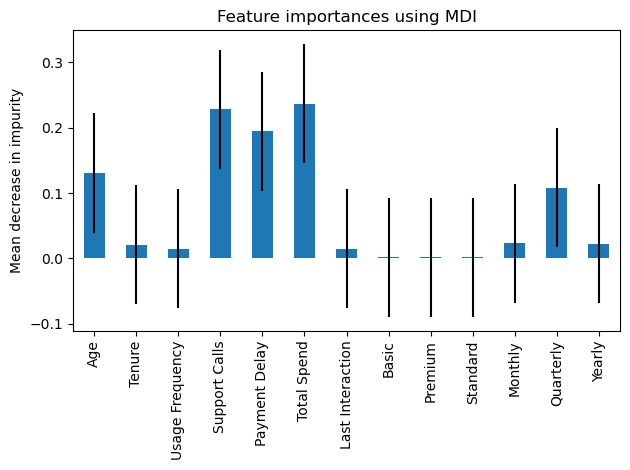

In [23]:
import pandas as pd
importances = plswrk.feature_importances_
std = pd.Series(importances).std()

# ttest = X_train.drop('Payment Delay', axis=1)

forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [24]:
# from sklearn.inspection import permutation_importance
# import time

# start_time = time.time()
# result = permutation_importance(
#     plswrk, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
# )
# elapsed_time = time.time() - start_time
# print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

# forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

In [25]:
# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
# ax.set_title("Feature importances using permutation on full model")
# ax.set_ylabel("Mean accuracy decrease")
# fig.tight_layout()
# plt.show()

In [26]:
clean_train_df.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Basic,Premium,Standard,Monthly,Quarterly,Yearly
0,160831,-0.380843,0.000000,1.176837,0,0.635240,0.999542,2.099698,0,1.0,0.0,0.0,0.0,0.0,1.0
1,354435,-0.723623,0.291240,0.708254,0,0.378055,1.286965,2.099698,0,1.0,0.0,0.0,1.0,0.0,0.0
2,444576,-1.323487,0.812551,-0.228913,0,1.535389,0.030967,0.914810,1,0.0,1.0,0.0,1.0,0.0,0.0
3,130847,-1.237792,0.486732,0.591108,2,0.249463,0.483426,0.519848,0,0.0,0.0,1.0,0.0,0.0,1.0
4,108121,-1.066402,0.000000,1.176837,1,-0.907871,0.055382,0.000000,0,1.0,0.0,0.0,0.0,0.0,1.0


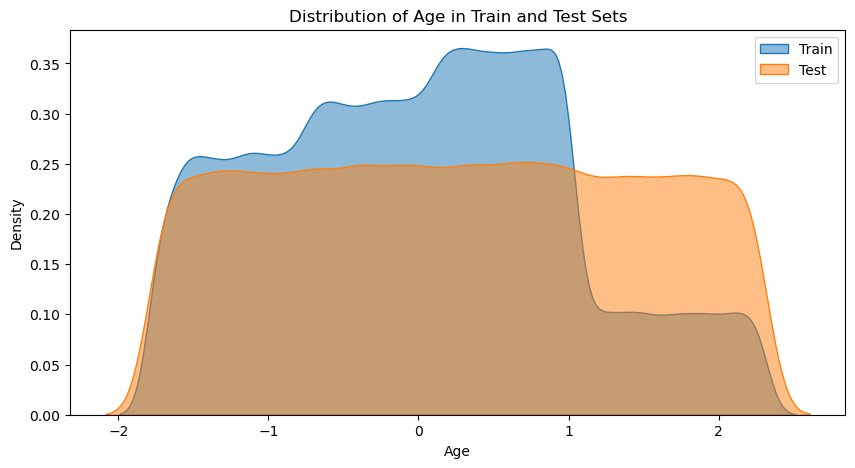

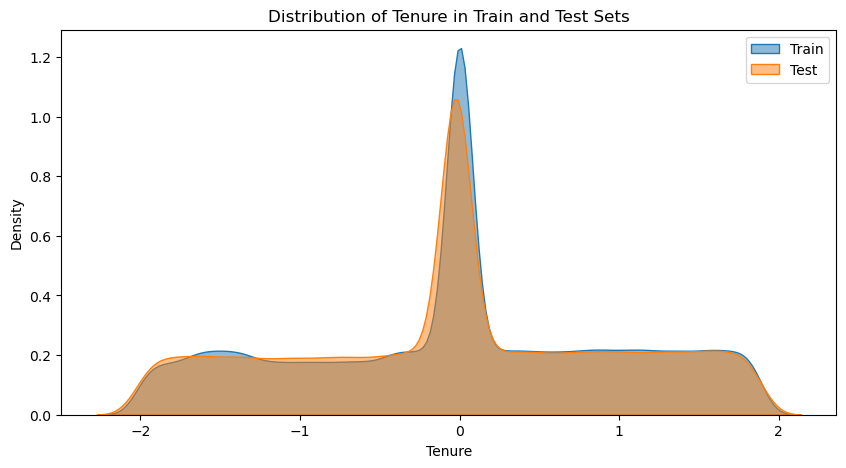

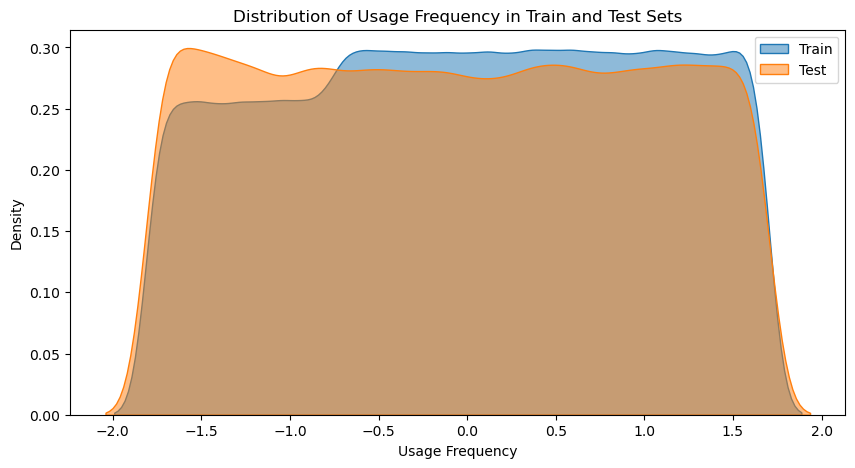

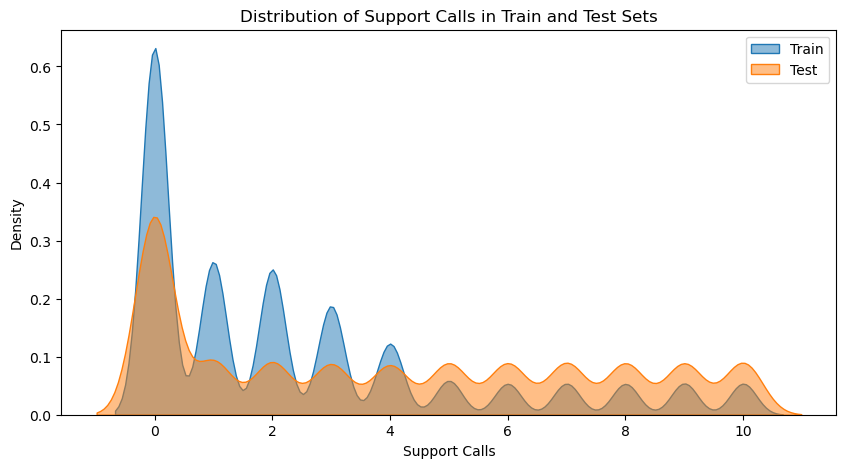

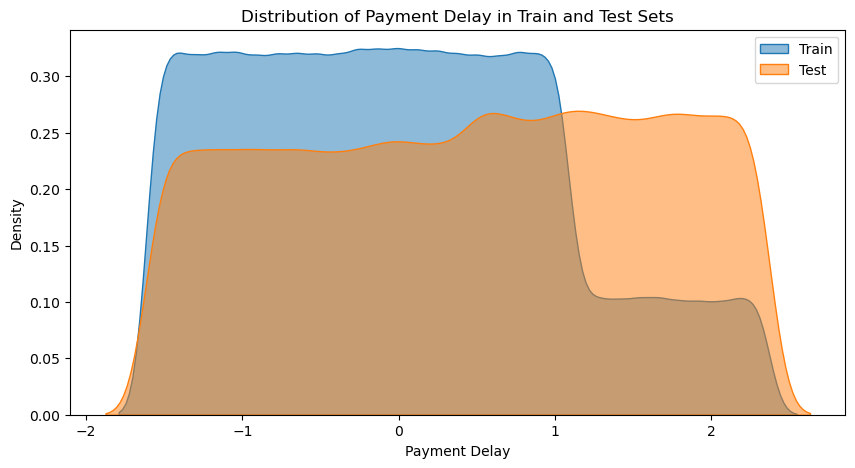

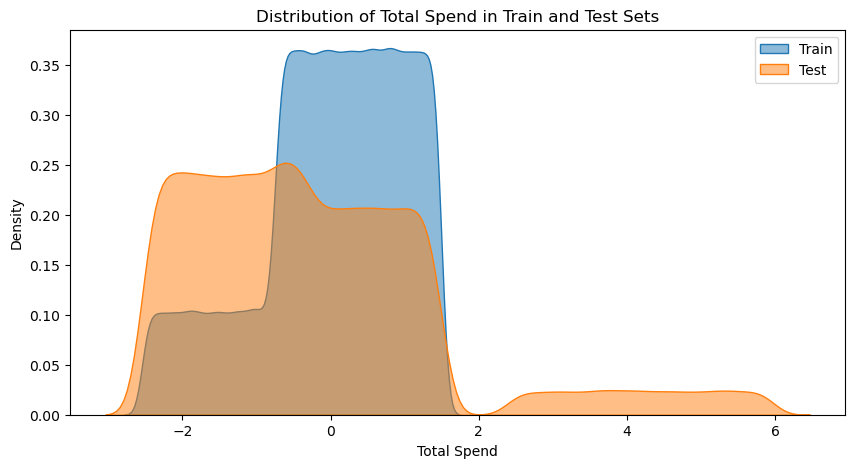

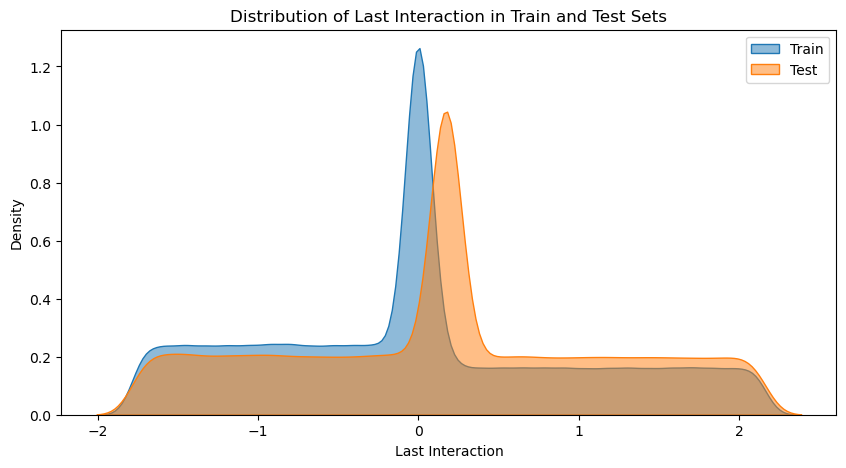

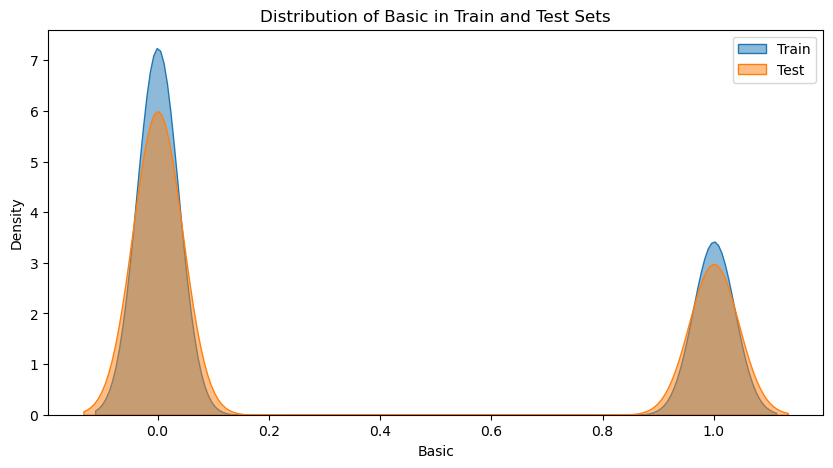

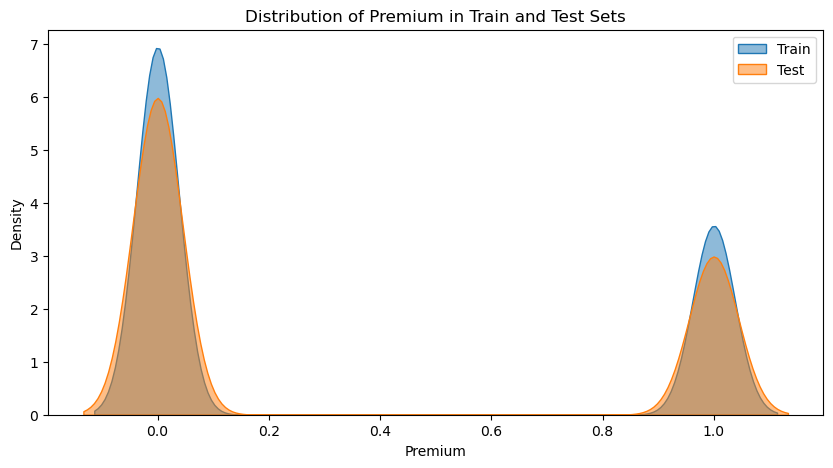

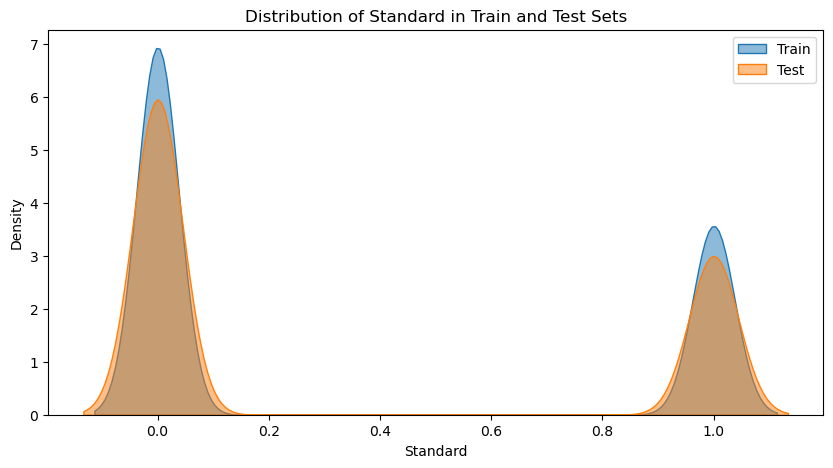

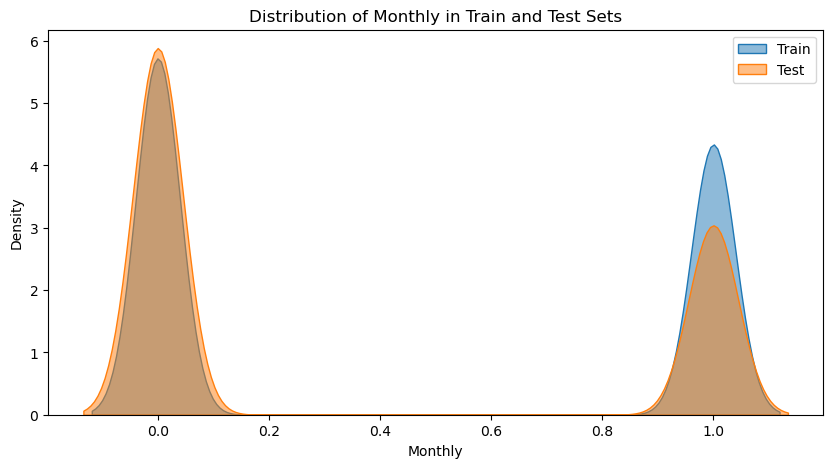

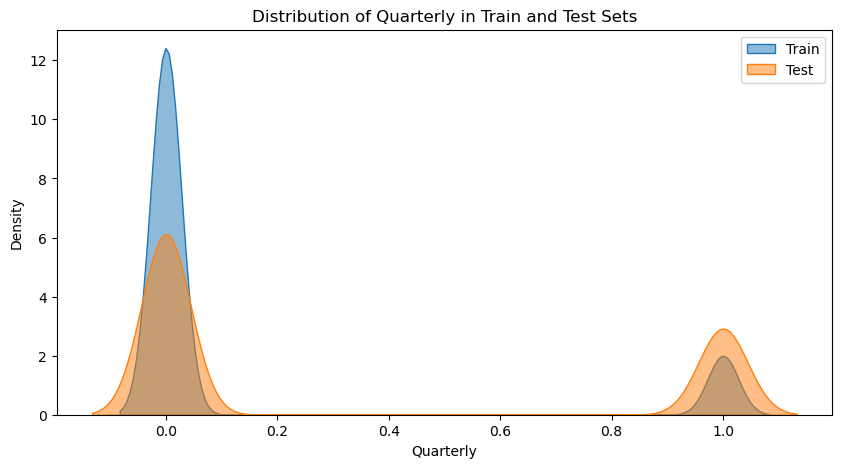

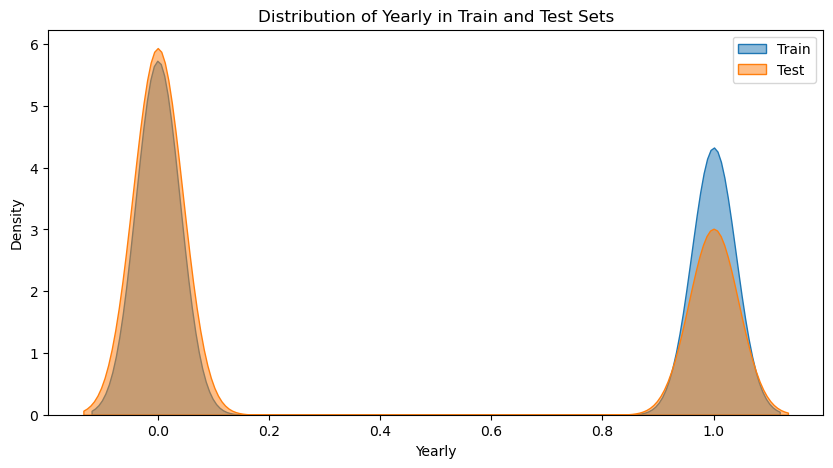

In [27]:
# plot the distributions of each variable in both the clean test and clean train data to see if the distributions match
# ttest = clean_train_df.drop('Payment Delay', axis=1)

for column in X_train:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(clean_train_df[column], label='Train', fill=True, alpha=0.5)
    sns.kdeplot(clean_test_df[column], label='Test', fill=True, alpha=0.5)
    plt.title(f'Distribution of {column} in Train and Test Sets')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [28]:
print("ROC AUC Score:", roc_auc_score(y_test, plswrk.predict_proba(X_test)[:, 1]))
# print out evaluation metrics for the best model
print("Accuracy Score:", accuracy_score(y_test, plswrk.predict(X_test)))
print("Precision Score:", precision_score(y_test, plswrk.predict(X_test)))
print("Recall Score:", recall_score(y_test, plswrk.predict(X_test)))
print("F1 Score:", f1_score(y_test, plswrk.predict(X_test)))

ROC AUC Score: 0.9411501198052801
Accuracy Score: 0.8903092783505154
Precision Score: 0.7524839147371646
Recall Score: 0.9452905921812284
F1 Score: 0.8379392698737632


In [30]:
predict_df = clean_test_df.drop("CustomerID", axis=1)
prediction_csv = pd.DataFrame({"CustomerID": clean_test_df["CustomerID"], "Churn": plswrk.predict_proba(predict_df)[:, 1]})
prediction_csv.to_csv("data/prediction16.csv", index=False)
print(prediction_csv)

        CustomerID     Churn
0           262106  0.715478
1            37061  0.710166
2           361832  0.631686
3           425516  0.567348
4            60597  0.690419
...            ...       ...
133771      396573  0.687191
133772      452602  0.721650
133773      424958  0.676838
133774      242104  0.678621
133775      132430  0.753862

[133776 rows x 2 columns]
